# **Leetcode Problem Solving - Part 2**

## **Part C : Simulation**

### **Q)682. Baseball Game**

You are keeping the scores for a baseball game with strange rules. At the beginning of the game, you start with an empty record.

You are given a list of strings operations, where operations[i] is the ith operation you must apply to the record and is one of the following:

* An integer x.
> * Record a new score of x.
* '+'.
> * Record a new score that is the sum of the previous two scores.
* 'D'.
> * Record a new score that is the double of the previous score.
* 'C'.
> * Invalidate the previous score, removing it from the record.

Return the sum of all the scores on the record after applying all the operations.

The test cases are generated such that the answer and all intermediate calculations fit in a 32-bit integer and that all operations are valid.

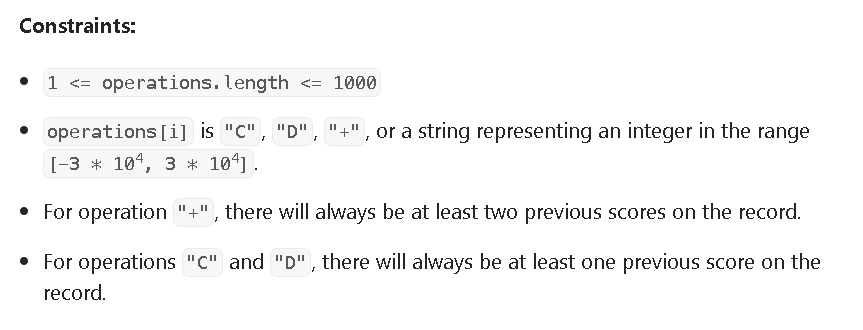

In [8]:
class Solution:
    def calPoints(self, ops: list[str]) -> int:
        i = j = 0
        while j < len(ops):
            if ops[j] == "C":
                i -= 2
            elif ops[j] == "D":
                ops[i] = int(ops[i-1])*2
            elif ops[j] == "+":
                ops[i] = int(ops[i-1]) + int(ops[i-2])
            else:
                ops[i] = int(ops[j])
            i += 1
            j += 1
        return sum(ops[:i])

### **657. Robot Return to Origin**

There is a robot starting at the position (0, 0), the origin, on a 2D plane. Given a sequence of its moves, judge if this robot ends up at (0, 0) after it completes its moves.

You are given a string moves that represents the move sequence of the robot where moves[i] represents its ith move. Valid moves are 'R' (right), 'L' (left), 'U' (up), and 'D' (down).

Return true if the robot returns to the origin after it finishes all of its moves, or false otherwise.

**Note:** The way that the robot is "facing" is irrelevant. 'R' will always make the robot move to the right once, 'L' will always make it move left, etc. Also, assume that the magnitude of the robot's movement is the same for each move.

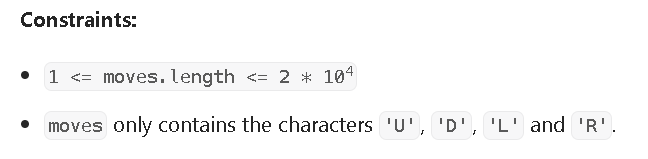

In [9]:
class Solution:
    def judgeCircle(self, moves: str) -> bool:

        return moves.count('R') == moves.count('L') and moves.count('U') == moves.count('D')

### **1275. Find Winner on a Tic Tac Toe Game**

Tic-tac-toe is played by two players A and B on a 3 x 3 grid. The rules of Tic-Tac-Toe are:

* Players take turns placing characters into empty squares ' '.
* The first player A always places 'X' characters, while the second player B always places 'O' characters.
* 'X' and 'O' characters are always placed into empty squares, never on filled ones.
* The game ends when there are three of the same (non-empty) character filling any row, column, or diagonal.
* The game also ends if all squares are non-empty.
* No more moves can be played if the game is over.

Given a 2D integer array moves where moves[i] = [rowi, coli] indicates that the ith move will be played on grid[rowi][coli]. return the winner of the game if it exists (A or B). In case the game ends in a draw return "Draw". If there are still movements to play return "Pending".

You can assume that moves is valid (i.e., it follows the rules of Tic-Tac-Toe), the grid is initially empty, and A will play first.

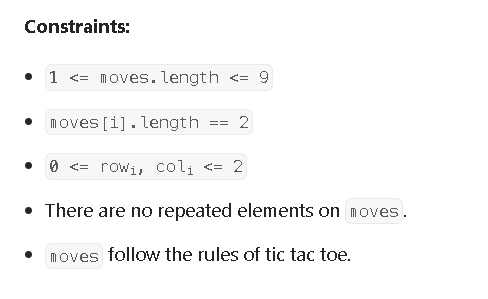

In [10]:
class Solution:
    def tictactoe(self, moves: list[list[int]]) -> str:
        Row,Col=[0,0,0],[0,0,0]
        Diag1,Diag2 = 0,0
        i=0
        while i<len(moves):
            if i%2==0:
                mark=-1
            else:
                mark=1
            Col[moves[i][0]]+=mark
            Row[moves[i][1]]+=mark
            if moves[i] in ([0,0],[1,1],[2,2]):
                Diag1+=mark
            if moves[i] in ([0,2],[1,1],[2,0]):
                Diag2+=mark
            #print (H,V,D1,D2,moves[i])
            if 3 in Row or 3 in Col or Diag1==3 or Diag2==3:
                return 'B'
            if -3 in Row or -3 in Col or Diag1==-3 or Diag2==-3:
                return 'A'
            i+=1
        if len(moves)==9:
                return 'Draw'
        else:
                return 'Pending'



### **1041. Robot Bounded In Circle**

On an infinite plane, a robot initially stands at (0, 0) and faces north. Note that:

* The north direction is the positive direction of the y-axis.
* The south direction is the negative direction of the y-axis.
* The east direction is the positive direction of the x-axis.
* The west direction is the negative direction of the x-axis.

The robot can receive one of three instructions:

* "G": go straight 1 unit.
* "L": turn 90 degrees to the left (i.e., anti-clockwise direction).
* "R": turn 90 degrees to the right (i.e., clockwise direction).

The robot performs the instructions given in order, and repeats them forever.

Return True if and only if there exists a circle in the plane such that the robot never leaves the circle.

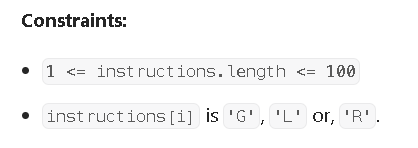



In [11]:
class Solution:
  def isRobotBounded(self, instructions: str) -> bool:
        x, y = 0, 0
        dx, dy = 0, 1
        for instruction in instructions:
            if instruction == 'L':
                dx, dy = -dy, dx
            elif instruction == 'R':
                dx, dy = dy, -dx
            elif instruction == 'G':
                x += dx
                y += dy

        return (dx, dy) != (0, 1) or (x, y) == (0, 0)

--------------------------------------------------------------------------------
-------------------------------------------------------------------------------

## **Part D: Matrix**


### **1672. Richest Customer Wealth**

You are given an m x n integer grid accounts where accounts[i][j] is the amount of money the i​​​​​​​​​​​th​​​​ customer has in the j​​​​​​​​​​​th​​​​ bank. Return the wealth that the richest customer has.

A customer's wealth is the amount of money they have in all their bank accounts. The richest customer is the customer that has the maximum wealth.

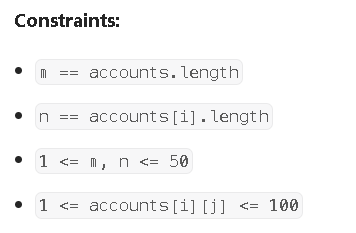

In [12]:
class Solution:
    def maximumWealth(self, accounts: list[list[int]]) -> int:
        total =[]
        for ac in accounts:
            total.append(sum(ac))
        return max(total)


### **1572. Matrix Diagonal Sum**

Given a square matrix mat, return the sum of the matrix diagonals.

Only include the sum of all the elements on the primary diagonal and all the elements on the secondary diagonal that are not part of the primary diagonal.

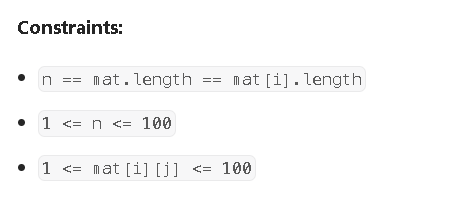

In [13]:
class Solution:
    def diagonalSum(self, mat: list[list[int]]) -> int:
        sum=0
        for i in range(len(mat)):
            for j in range(len(mat[i])):
                if i == j or i+j == len(mat[i])-1:
                    sum += mat[i][j]
        return sum


### **54. Spiral Matrix**

Given an m x n matrix, return all elements of the matrix in spiral order.

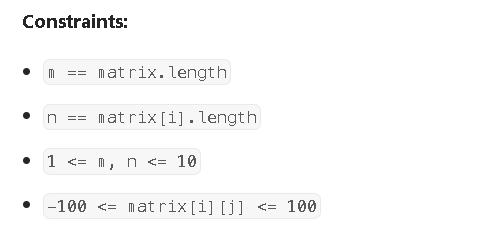

In [14]:
class Solution:
    def spiralOrder(self, matrix: list[list[int]]) -> list[int]:
        res = []
        left, right = 0, len(matrix[0])
        top, bottom = 0, len(matrix)

        while left < right and top < bottom:
            # top row
            for i in range(left, right):
                res.append(matrix[top][i])
            top += 1
            # right column
            for i in range(top, bottom):
                res.append(matrix[i][right - 1])
            right -= 1
            if not (left < right and top < bottom):
                break
            # bottom row
            for i in range(right - 1, left - 1, -1):
                res.append(matrix[bottom - 1][i])
            bottom -= 1
            # left column
            for i in range(bottom - 1, top - 1, -1):
                res.append(matrix[i][left])
            left += 1

        return res

### **73. Set Matrix Zeroes**

Given an m x n integer matrix matrix, if an element is 0, set its entire row and column to 0's.

You must do it in place.


In [15]:
class Solution:
    def setZeroes(self, matrix: list[list[int]]) -> None:
        # O(1)
        ROWS, COLS = len(matrix), len(matrix[0])
        row_zero = False

        # determine which rows/cols need to be zero
        for r in range(len(matrix)):
            for c in range(len(matrix[0])):
                if matrix[r][c] == 0:
                    matrix[0][c] = 0
                    if r > 0:
                        matrix[r][0] = 0
                    else:
                        row_zero = True

        for r in range(1, len(matrix)):
            for c in range(1, len(matrix[0])):
                if matrix[0][c] == 0 or matrix[r][0] == 0:
                    matrix[r][c] = 0

        if matrix[0][0] == 0:
            for r in range(len(matrix)):
                matrix[r][0] = 0

        if row_zero == True :
            for c in range(len(matrix[0])):
                matrix[0][c] = 0

------------------------------------------------------------------------------
--------------------------------------------------------------------------------

## **Part E : Math**

### **1523. Count Odd Numbers in an Interval Range**

Given two non-negative integers low and high. Return the count of odd numbers between low and high (inclusive).

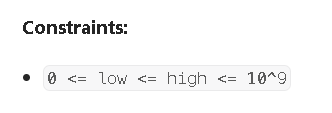

In [16]:
class Solution:
    def countOdds(self, low: int, high: int) -> int:
        if low%2!=0 or high%2!=0:
            return (high-low)//2 +1
        return (high-low)//2

### **1491. Average Salary Excluding the Minimum and Maximum Salary**

You are given an array of unique integers salary where salary[i] is the salary of the ith employee.

Return the average salary of employees excluding the minimum and maximum salary. Answers within 10-5 of the actual answer will be accepted.

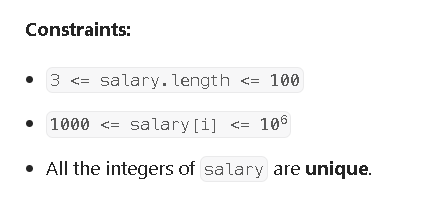

In [ ]:
class Solution:
  def average(self, salary: list[int]) -> float:
    return (sum(salary) - max(salary) - min(salary)) / (len(salary) - 2)

### **860. Lemonade Change**

At a lemonade stand, each lemonade costs `$5`. Customers are standing in a queue to buy from you and order one at a time (in the order specified by bills). Each customer will only buy one lemonade and pay with either a `$5, $10, or $20` bill. You must provide the correct change to each customer so that the net transaction is that the customer pays `$5`.

Note that you do not have any change in hand at first.

Given an integer array bills where bills[i] is the bill the ith customer pays, return true if you can provide every customer with the correct change, or false otherwise.

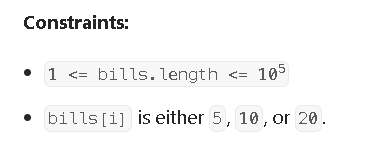


In [17]:
class Solution:
  def lemonadeChange(self, bills: list[int]) -> bool:
    cnt_5 , cnt_10 = 0,0
    for bill in bills:
      if bill == 5:
        cnt_5 += 1
      elif bill == 10:
        cnt_5 -= 1
        cnt_10 += 1
      else:  # bill == 20
        if cnt_10 > 0:
            cnt_10 -= 1
            cnt_5 -= 1
        else:
            cnt_5 -= 3

      if cnt_5 < 0:
        return False
    return True

### **976. Largest Perimeter Triangle**

Given an integer array nums, return the largest perimeter of a triangle with a non-zero area, formed from three of these lengths. If it is impossible to form any triangle of a non-zero area, return 0.

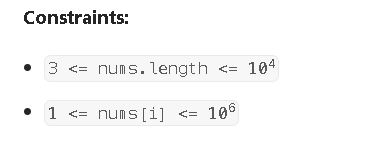

In [18]:
class Solution:
  def largestPerimeter(self, nums: list[int]) -> int:
        nums.sort(reverse=True)

        for i in range(len(nums)-2):
            side_a = nums[i]
            side_b = nums[i+1]
            side_c = nums[i+2]
            if side_a < side_b + side_c:
                return side_a + side_b + side_c

        return 0

### **1232. Check If It Is a Straight Line**

You are given an array coordinates, coordinates[i] = [x, y], where [x, y] represents the coordinate of a point. Check if these points make a straight line in the XY plane.

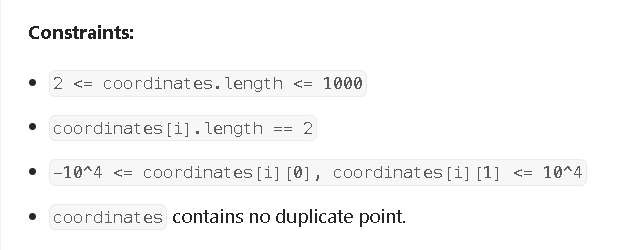

In [ ]:
class Solution:
    def checkStraightLine(self, coordinates: list[list[int]]) -> bool:
        x1, y1 = coordinates[0]
        x2, y2 = coordinates[1]

        for x, y in coordinates[2:]:
            if (y2 - y1) * (x - x1) != (x2 - x1) * (y - y1):
                return False

        return True

### **67. Add Binary**

Given two binary strings a and b, return their sum as a binary string.

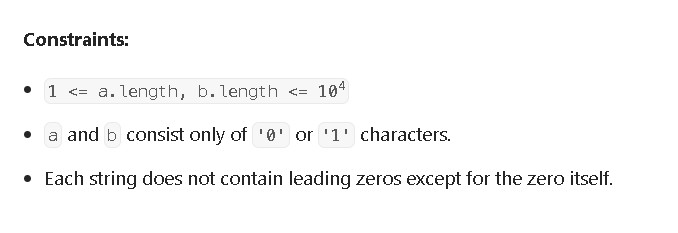

In [19]:
class Solution:
    def addBinary(self, a: str, b: str) -> str:
        return bin(int(a,2)+int(b,2))[2:]

### **43. Multiply Strings**

Given two non-negative integers num1 and num2 represented as strings, return the product of num1 and num2, also represented as a string.

**Note:** You must not use any built-in BigInteger library or convert the inputs to integer directly.

In [20]:
class Solution:
    def multiply(self, num1: str, num2: str) -> str:

        if len(num1) == 0 or len(num2) == 0:
            return '0'
        if num1[0] == '0' or num2[0] == '0':
            return '0'

        res1, res2 = 0, 0
        for d in num1:
            res1 = res1 * 10 + (ord(d) - ord('0'))
        for d in num2:
            res2 = res2 * 10 + (ord(d) - ord('0'))


        res = res1 * res2

        ans = ''
        while res:
            ans = ans +(chr(ord('0') + res % 10))
            res //= 10
        return ans[::-1]

### **50. Pow(x, n)**

Implement pow(x, n), which calculates x raised to the power n (i.e.,x^n).

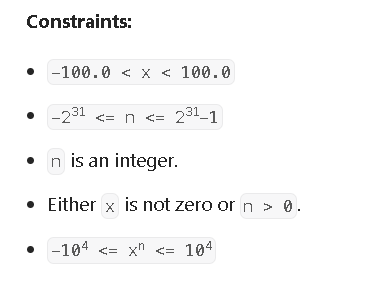

In [21]:
class Solution:
    def myPow(self, x: float, n: int) -> float:
        if n == 0 or x == 1.0:
            return 1.0
        if x == 0:
            if n < 0:
                return float('inf')
            else:
                return 0.0

        if n < 0:
            x, n = 1/x, -n

        res, num, power = 1.0, x, n
        while power != 1:
            if power % 2 == 0:
                num = num * num
                power /= 2
            else:
                res *= num
                power -= 1

        return res * num


-------------------------------------------------------------------------------
--------------------------------------------------------------------------------


**Submitted by : Mrudula A P**